# Exploratory Data Analysis

Sau khi hoàn thành phần tiền xử lí dữ liệu, dữ liệu đã được làm sạch giúp ta trả lời một số câu hỏi chính xác và rõ ràng hơn.  
##### Đầu tiên, import các thư viện cần thiết

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### Load data

In [71]:
steam_df = pd.read_csv('processed_data.csv')
steam_df.head()

,Title,withDLC,isMature,Developer,Publisher,PositiveReviews,TotalReviews,NegativeReviews,Price,ReleaseYear,...,Genre__RPG,Genre__Racing,Genre__Simulation,Genre__Software Training,Genre__Sports,Genre__Strategy,Genre__Utilities,Genre__Video Production,Genre__Web Publishing,Rating
0,Endless Monday: Dreams and Deadlines,0,0,hcnone,hcnone,737,737,0,142000.0,2023,...,0,0,0,0,0,0,0,0,0,0.931514
1,Papa's Freezeria Deluxe,0,0,Flipline Studios,Flipline Studios,6514,6562,48,87500.0,2023,...,0,0,1,0,0,1,0,0,0,0.957730
2,Cats Hidden in Jingle Jam,0,0,Travellin Cats,Travellin Cats,5097,5108,11,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.959760
3,An Arcade Full of Cats,1,0,Devcats,Devcats,3018,3045,27,0.0,2023,...,0,0,0,0,0,0,0,0,0,0.947230
4,Ib,0,0,kouri,PLAYISM,3068,3098,30,150000.0,2022,...,0,0,0,0,0,0,0,0,0,0.946714


### Câu hỏi 1: Nhà phát triển game nào có tiềm năng phát triển nhất?
Để trả lời câu hỏi này trước tiên ta sẽ xem xét có bao nhiêu nhà phát triển trong bộ dữ liệu.   
Sau đó chọn ra các nhà phát triển có các game ở mức rating cao và xem xét các game từ trước đến hiện tại của các developer đó và vẽ biểu đồ thể hiện xu hướng.

Xem xét các developer:

In [72]:
dev_df = steam_df['Developer'].value_counts()

# Number of dev
len(dev_df)

2118

Có khá nhiều Developer, để dễ dàng quan sát và phân tích ta chỉ lấy top 10 nhà phát triển đã phát triển được nhiều game nhất để phân tích.  
Sau đó ta xét các thời điểm của top 10 nhà phát triển để được một mảng `list_date`


In [73]:
# Top 10 Developer
top10_dev_df = dev_df.nlargest(10)
top10_dev_df = steam_df[steam_df['Developer'].isin(top10_dev_df.index)][['Developer', 'Title', 'ReleaseYear', 'ReleaseMonth', 'Rating']]


In [74]:
top10_dev_df['ReleaseYear'] = top10_dev_df['ReleaseYear'].astype(str)
top10_dev_df['ReleaseMonth'] = top10_dev_df['ReleaseMonth'].astype(str)

# Combine 'year' and 'month' and convert to datetime
top10_dev_df['ReleaseYM'] = pd.to_datetime(top10_dev_df['ReleaseYear'] + top10_dev_df['ReleaseMonth'], format='%Y%m')

top10_dev_df.drop(['ReleaseYear', 'ReleaseMonth'], axis=1, inplace=True)
top10_dev_df

,Developer,Title,Rating,ReleaseYM
15,上海アリス幻樂団,Touhou Fuujinroku ~ Mountain of Faith.,0.926266,2007-08-01
27,上海アリス幻樂団,Touhou Tenkuushou ~ Hidden Star in Four Seasons.,0.946943,2017-08-01
47,上海アリス幻樂団,Touhou Kouryudou ~ Unconnected Marketeers.,0.929785,2021-05-01
56,上海アリス幻樂団,Touhou Kanjuden ~ Legacy of Lunatic Kingdom.,0.925707,2015-08-01
76,"PopCap Games, Inc.",Peggle Deluxe,0.938026,2007-02-01
...,...,...,...,...
2598,HeR Interactive,Nancy Drew®: Message in a Haunted Mansion,0.749529,2000-11-01
2601,HeR Interactive,Nancy Drew®: Treasure in the Royal Tower,0.748897,2001-08-01
2670,Chilla's Art,[Chilla's Art] The Ghost Train | 幽霊列車,0.753257,2020-07-01
2675,Chilla's Art,[Chilla's Art] Inunaki Tunnel | 犬鳴トンネル,0.749736,2019-11-01


In [82]:
tmp = top10_dev_df.groupby('Developer')
chillas_art_df = tmp.get_group('Chilla\'s Art').sort_values(by=['ReleaseYM'])
chillas_art_df
chinese_df = tmp.get_group('上海アリス幻樂団').sort_values(by=['ReleaseYM'])

In [83]:
chillas_art_df['ReleaseYM'] = chillas_art_df['ReleaseYM'].dt.strftime('%Y-%m').values
chinese_df['ReleaseYM'] = chinese_df['ReleaseYM'].dt.strftime('%Y-%m').values

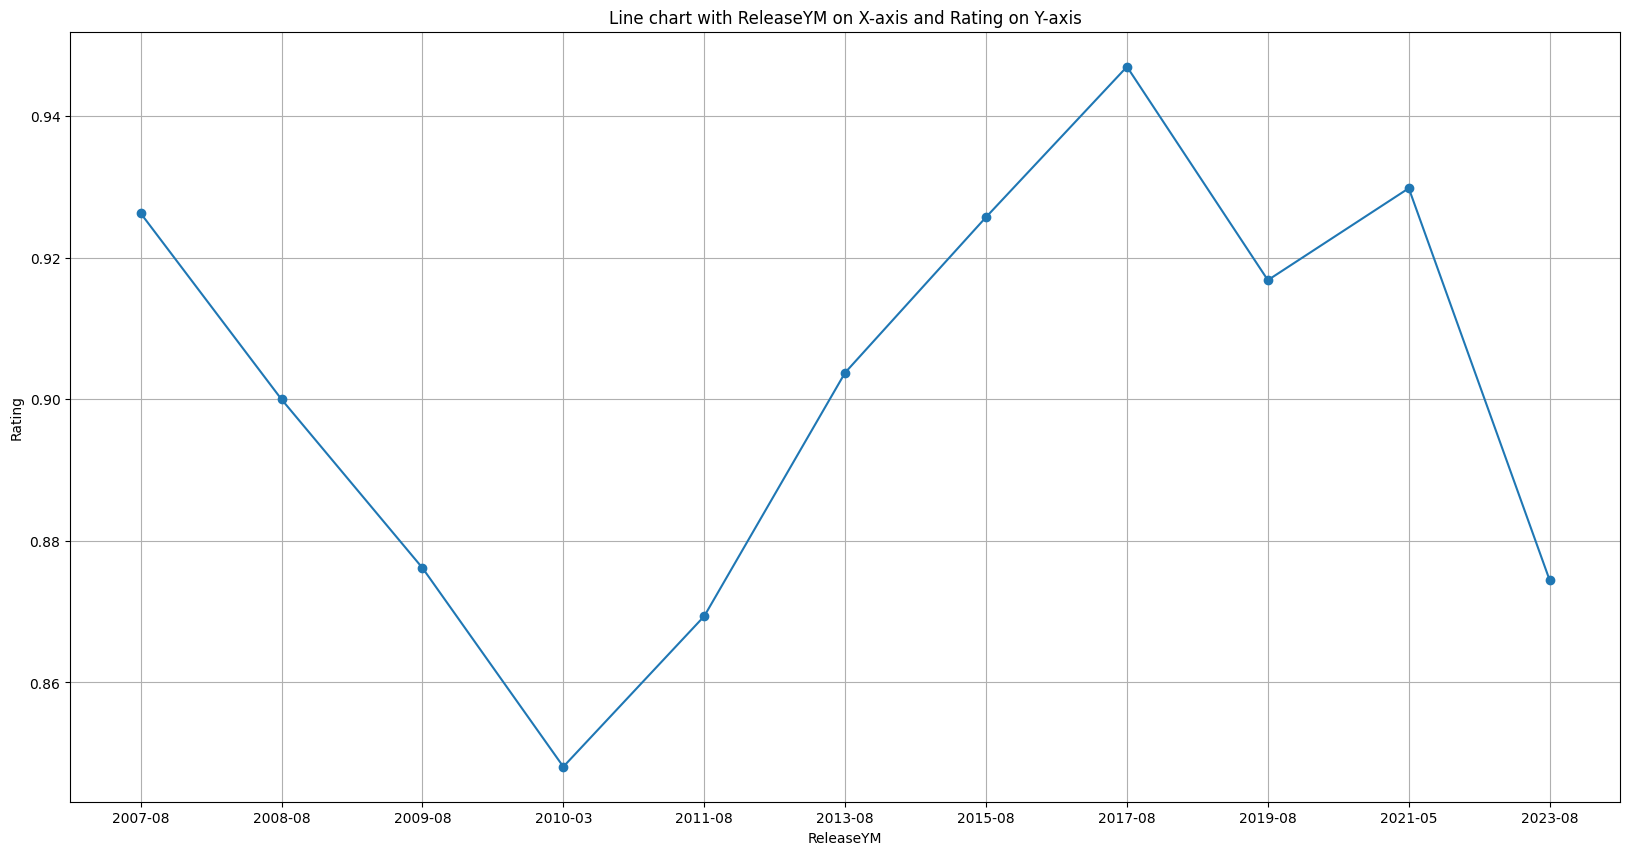

In [92]:
plt.figure(figsize=(20,10))

# plt.plot(chillas_art_df['ReleaseYM'], chillas_art_df['Rating'])
plt.plot(chinese_df['ReleaseYM'], chinese_df['Rating'], marker='o', label='上海アリス幻樂団')

plt.title("Line chart with ReleaseYM on X-axis and Rating on Y-axis")
plt.xlabel("ReleaseYM")
plt.ylabel("Rating")

plt.grid(True)
plt.show()